### Mnist intro

In [3]:
!python --version

Python 3.6.5 :: Anaconda, Inc.


In [6]:
#!pip install keras

In [11]:
#!pip install tensorflow

In [7]:
from __future__ import print_function  
# for Python2 compatibility 

In [43]:
import numpy as np
np.random.seed(1337)   # for experiment reproducibility 

In [12]:
import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [13]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [17]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


x_train = (60000 images, 28 pixels times 28 pixels)
x_test = (10000 images, 28 pixels times 28 pixels)

Anyway we want to resahpe the vectors into

x_train = (60000 images, 784 elements)
x_test = (10000 images, 784 elements)

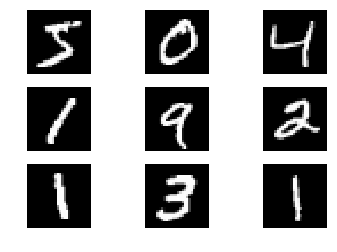

In [5]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i,0], cmap='gray')
    plt.axis('off')

In [20]:
x_train = x_train.reshape(60000, 784)   # 28 x 28 = 784 
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') #avoiding integers
x_test = x_test.astype('float32')

In [31]:
#x_train /= 255    # change grayscale range  normalizing to the max element on every tensor,from 0-255 to 0-1
#x_test  /= 255
x_train = x_train/255
x_test = x_test/255

In [33]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [38]:
print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


Now regarding on the clases, in this case, since we're dealing with 10 numbers means we have 10 classes, however the machine learn better with dummy variables, so better we use one-hot vector.

In [48]:
num_classes = 10 #numners

In [45]:
np.unique(y_train) #unique classes on the dataset

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [49]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [56]:
for i in range(3):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Creating a draft model: Always needed models, and layers (for instance dense layer, all nodes connected with all of the next layer)

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

In [59]:
model = Sequential()

In [60]:
model.add(Dense(512, activation='sigmoid', input_shape=(784,)  ))
#(512 nodes, activation function, vector shape of each data input point, 784 this case = 28*28 pixels, corresponds to the shape of the trainig set)

In [61]:
model.add(Dense(512, activation='sigmoid'))
#in the second layer is not needed to especify the shape since keras knows the latest output

In [62]:
model.add(Dense(num_classes, activation='softmax'))
#the last layer finally classifies which vector should belong to

In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


784*512 = 401920  
512*512 = 262656  
512*10 = 5130 
sum() = 669,706

In [64]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
metrics=['accuracy'])

In [65]:
batch_size = 128     
epochs = 2 #has seen all the data points 2 times

In [66]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 5s 77us/step - loss: 2.2733 - acc: 0.1880 - val_loss: 2.2331 - val_acc: 0.2969
Epoch 2/2
60000/60000 [==============================] - 5s 76us/step - loss: 2.1940 - acc: 0.3729 - val_loss: 2.1435 - val_acc: 0.3228


from 0.2969 to 0.3228 in just 2 epochs, good start

In [67]:
score = model.evaluate(x_test, y_test, verbose=0)

In [68]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.1435061683654784
Test accuracy: 0.3228


Let's try with 20 epochs

See some great results [here](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#4d4e495354 ) to make some benchmark

In [ ]:
res = model.predict_classes(X_test[:30])

plt.figure(figsize = (20, 20))

for i in range(30):
    plt.subplot(5, 6, i+1)
    plt.imshow(X_test[i,0], cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel("Prediccion = %d" % res[i], fontsize=16)